# Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches

# Data Preparation

Lets Start by preparing the zillow dataset

In [2]:
zillow = pd.read_csv('Zip_Zhvi_2bedroom.csv')

In [3]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8946 entries, 0 to 8945
Columns: 262 entries, RegionID to 2017-06
dtypes: float64(213), int64(45), object(4)
memory usage: 17.9+ MB


Lets filter out the property prices for NY city

In [4]:
def find_newyork(city):
    return re.search('New York',city) != None

In [5]:
zillow_columns = [1,2,6]
zillow_columns += ([i for i in range(7,262)])
zillow_ny = zillow[zillow['City'].apply(find_newyork)].iloc[:,zillow_columns]

In [6]:
zillow_ny.head()

,RegionName,City,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,10025,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
2,10023,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
13,10128,New York,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1526000,1523700,1527200,1541600.0,1557800,1582900,1598900,1646100,1720500,1787100
14,10011,New York,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2354000,2355500,2352200,2332100.0,2313300,2319600,2342100,2365900,2419700,2480400
20,10003,New York,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1932800,1930400,1937500,1935100.0,1915700,1916500,1965700,2045300,2109100,2147000


#  A graph to show house price trends over the last 5 years(2012-2017) across various zipcodes
We can see that there are a lot of null values in the earlier years of the dataset. Thus we can plot a trend of house prices across various zipcodes.

In [7]:
dates = list(zillow_ny.columns[-60:])
number_of_dates = range(1,9*(len(dates)),9)
region_names = list(zillow_ny.RegionName)
date_ticks = [dates[i] for i in range(1,61,5)]
number_of_dates_ticks = [number_of_dates[i] for i in range(1,61,5)]

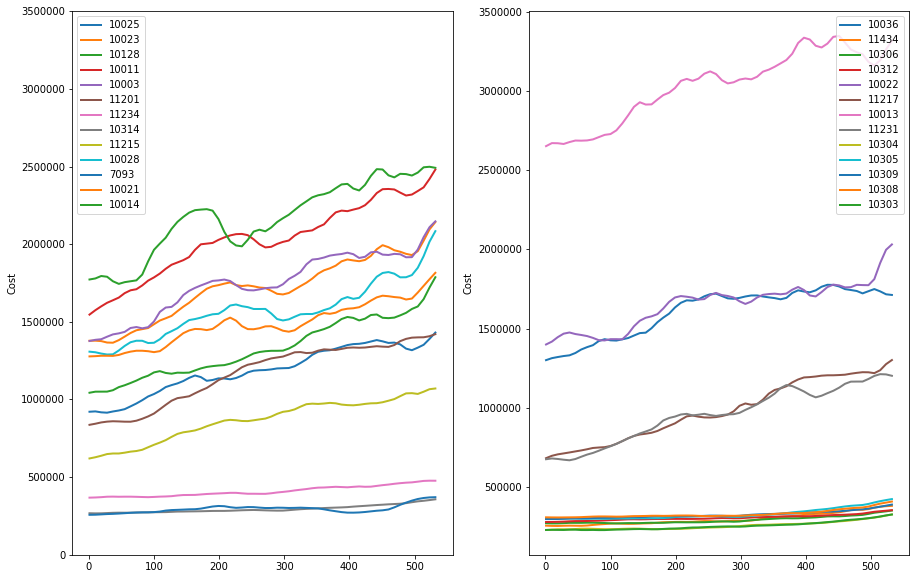

In [8]:
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(121)
for zipcodes in list(zillow_ny.RegionName)[:len(list(zillow_ny.RegionName))//2]:
    values = zillow_ny[zillow_ny['RegionName'] == zipcodes].iloc[:,-60:].values.tolist()[0]
    ax.plot(number_of_dates, values, label = zipcodes, linewidth=2)
ax.set_ylim(0,3500000)
ax.set_ylabel("Cost")
ax.legend()
ax2 = plt.subplot(122)
for zipcodes in list(zillow_ny.RegionName)[len(list(zillow_ny.RegionName))//2:]:
    values = zillow_ny[zillow_ny['RegionName'] == zipcodes].iloc[:,-60:].values.tolist()[0]
    ax2.plot(number_of_dates, values, label = zipcodes, linewidth=2)
ax2.set_ylabel("Cost")
ax2.legend()

In [9]:
zillow_ny['estimated_price'] = zillow_ny[['2017-01','2017-02','2017-03','2017-04','2017-05','2017-06']].median(axis=1)

In [10]:
zillow_ny.shape

(26, 259)

In [11]:
cols = [i for i in range(3,258)]
zillow_ny.drop(zillow_ny.columns[cols],axis=1,inplace=True)

In [12]:
zillow_ny.head()

,RegionName,City,SizeRank,estimated_price
0,10025,New York,1,1342900.0
2,10023,New York,3,1988700.0
13,10128,New York,14,1622500.0
14,10011,New York,15,2354000.0
20,10003,New York,21,2005500.0


Now Lets start by preparing our Airbnb dataset
Since zillow provides data for only 2 bedroom houses, we will also select only 2 bedroom listings.

In [13]:
airbnb = pd.read_csv('Listings.csv', low_memory=False)

In [14]:
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7949480,https://www.airbnb.com/rooms/7949480,20170502132028,2017-05-03,City Island Sanctuary relaxing BR & Bath w Par...,Come relax on City Island in our quiet guest r...,"On parle français et anglais, (lire Français c...",Come relax on City Island in our quiet guest r...,none,City Island is a unique sanctuary in New York ...,...,10.0,f,NaN,NaN,f,moderate,t,t,1,1.59
1,16042478,https://www.airbnb.com/rooms/16042478,20170502132028,2017-05-04,WATERFRONT STUDIO APARTMENT,My place is close to Sea Shore. You’ll love my...,(URL HIDDEN),My place is close to Sea Shore. You’ll love my...,none,(URL HIDDEN),...,NaN,f,NaN,NaN,t,flexible,f,f,1,NaN
2,1886820,https://www.airbnb.com/rooms/1886820,20170502132028,2017-05-04,Quaint City Island Community.,Quiet island boating town on Long Island Soun...,"Master bed with queen bed, full bath and offi...",Quiet island boating town on Long Island Soun...,none,Small New England type town in the middle of ...,...,NaN,f,NaN,NaN,f,strict,f,f,1,NaN
3,6627449,https://www.airbnb.com/rooms/6627449,20170502132028,2017-05-05,Large 1 BDRM in Great location,This ground floor apartment is light and airy ...,"We are close to fishing, boating, biking, hors...",This ground floor apartment is light and airy ...,none,City Island is a unique and a hidden gem of Ne...,...,10.0,f,NaN,NaN,f,strict,f,f,1,0.54
4,5557381,https://www.airbnb.com/rooms/5557381,20170502132028,2017-05-04,Quaint City Island Home,"Located in an old sea-shanty town, our home ha...",You won't find a place so close to the city (N...,"Located in an old sea-shanty town, our home ha...",none,"City Island is unique in two ways. First, you ...",...,10.0,f,NaN,NaN,t,moderate,f,f,1,3.63


In [15]:
airbnb_columns = ['id','city','state','zipcode','bedrooms','last_scraped','square_feet','price','weekly_price','monthly_price','cleaning_fee','number_of_reviews','review_scores_rating']
airbnb = airbnb[airbnb['bedrooms']==2].loc[:,airbnb_columns]

In [16]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4894 entries, 12 to 40752
Data columns (total 13 columns):
id                      4894 non-null int64
city                    4889 non-null object
state                   4894 non-null object
zipcode                 4832 non-null object
bedrooms                4894 non-null float64
last_scraped            4894 non-null object
square_feet             113 non-null float64
price                   4894 non-null object
weekly_price            1031 non-null object
monthly_price           851 non-null object
cleaning_fee            3928 non-null object
number_of_reviews       4894 non-null int64
review_scores_rating    3874 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 535.3+ KB


In [17]:
airbnb.last_scraped.unique()

array(['2017-05-03', '2017-05-04', '2017-05-05', '2017-05-02'],
      dtype=object)

Here we can actually see that all of our filtered airbnb listings were scrapped in May 2017. Taking this into consideration, I would like to base my analysis, as if we were predicting the most profited zipcodes in May of 2017. So that if a real estate agent would like to invest in a property in May 2017, what zipcodes he should aim for. Thus from the given Zillow dataset we can actually find the estimated property prices of 2 bedrooms in May 2017. Let us filter out other prices and keep the estimated prices of the properties from zillow dataset as the median price in the year 2017.

As we can see the zipcode column name in the zillow dataset is Region Name we will need to change it before we can merge the two datasets

In [18]:
zillow_ny.rename(columns={'RegionName' : 'zipcode'}, inplace=True)
zillow_ny.head()

,zipcode,City,SizeRank,estimated_price
0,10025,New York,1,1342900.0
2,10023,New York,3,1988700.0
13,10128,New York,14,1622500.0
14,10011,New York,15,2354000.0
20,10003,New York,21,2005500.0


Further data cleaning before merging

In [19]:
airbnb.dropna(subset=['zipcode'],inplace=True)
airbnb['zipcode'] = airbnb['zipcode'].apply(lambda x: str(x).split("-")[0])
airbnb['zipcode'] = pd.to_numeric(airbnb['zipcode'], downcast='integer')

In [20]:
airbnb.head()

,id,city,state,zipcode,bedrooms,last_scraped,square_feet,price,weekly_price,monthly_price,cleaning_fee,number_of_reviews,review_scores_rating
12,9513511,Bronx,NY,10462,2.0,2017-05-03,NaN,$130.00,NaN,NaN,NaN,4,85.0
23,5046189,Bronx,NY,10469,2.0,2017-05-04,NaN,$150.00,NaN,NaN,$75.00,31,95.0
33,4357134,New York,NY,11102,2.0,2017-05-05,NaN,$200.00,NaN,NaN,NaN,0,NaN
36,16027061,Queens,NY,11102,2.0,2017-05-05,NaN,$250.00,NaN,NaN,NaN,0,NaN
38,11301089,Astoria,NY,11105,2.0,2017-05-04,NaN,$79.00,NaN,NaN,$400.00,1,60.0


Now we have our Airbnb dataset and Zillow dataset ready to be merged.

# Merging Datasets

In [21]:
final_data = airbnb.merge(zillow_ny,how="inner",on='zipcode')

In [22]:
final_data.head()

,id,city,state,zipcode,bedrooms,last_scraped,square_feet,price,weekly_price,monthly_price,cleaning_fee,number_of_reviews,review_scores_rating,City,SizeRank,estimated_price
0,15910991,Staten Island,NY,10305,2.0,2017-05-03,NaN,$120.00,NaN,NaN,NaN,0,NaN,New York,2087,407900.0
1,17716523,Staten Island,NY,10305,2.0,2017-05-03,NaN,$110.00,NaN,NaN,$70.00,0,NaN,New York,2087,407900.0
2,16155769,Staten Island,NY,10305,2.0,2017-05-05,NaN,$150.00,NaN,NaN,NaN,0,NaN,New York,2087,407900.0
3,13370393,Staten Island,NY,10305,2.0,2017-05-02,NaN,$150.00,NaN,NaN,$65.00,0,NaN,New York,2087,407900.0
4,2611458,Staten Island,NY,10305,2.0,2017-05-04,NaN,$129.00,$780.00,"$2,415.00",$50.00,13,86.0,New York,2087,407900.0


We now have our final merged data which contains 22 Zipcodes from different regions like Manhatten, Queens, Bronx,Staten Island containing 1239 Entries.

In [23]:
print(final_data['city'].unique())
print("Unique Zipcodes",final_data['zipcode'].nunique())

['Staten Island' 'Statenisland ' 'Brooklyn' 'Brooklyn ' nan 'New York'
 'Chelsea, New York' 'NY' 'New York ' 'Park Slope, Brooklyn'
 'Park Slope ,Brooklyn' 'Jamaica ' 'Queens' 'Jamaica']
Unique Zipcodes 22


In [24]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239 entries, 0 to 1238
Data columns (total 16 columns):
id                      1239 non-null int64
city                    1238 non-null object
state                   1239 non-null object
zipcode                 1239 non-null int16
bedrooms                1239 non-null float64
last_scraped            1239 non-null object
square_feet             29 non-null float64
price                   1239 non-null object
weekly_price            257 non-null object
monthly_price           180 non-null object
cleaning_fee            1003 non-null object
number_of_reviews       1239 non-null int64
review_scores_rating    971 non-null float64
City                    1239 non-null object
SizeRank                1239 non-null int64
estimated_price         1239 non-null float64
dtypes: float64(4), int16(1), int64(3), object(8)
memory usage: 157.3+ KB


# Data Cleaning

In [25]:
#Setting bedrooms to int
final_data['bedrooms'] = pd.to_numeric(final_data['bedrooms'], downcast='integer')

In [26]:
final_data.head()

,id,city,state,zipcode,bedrooms,last_scraped,square_feet,price,weekly_price,monthly_price,cleaning_fee,number_of_reviews,review_scores_rating,City,SizeRank,estimated_price
0,15910991,Staten Island,NY,10305,2,2017-05-03,NaN,$120.00,NaN,NaN,NaN,0,NaN,New York,2087,407900.0
1,17716523,Staten Island,NY,10305,2,2017-05-03,NaN,$110.00,NaN,NaN,$70.00,0,NaN,New York,2087,407900.0
2,16155769,Staten Island,NY,10305,2,2017-05-05,NaN,$150.00,NaN,NaN,NaN,0,NaN,New York,2087,407900.0
3,13370393,Staten Island,NY,10305,2,2017-05-02,NaN,$150.00,NaN,NaN,$65.00,0,NaN,New York,2087,407900.0
4,2611458,Staten Island,NY,10305,2,2017-05-04,NaN,$129.00,$780.00,"$2,415.00",$50.00,13,86.0,New York,2087,407900.0


In [27]:
#Changing all prices from $price to price:integer
def change_price(price):
    price = str(price)
    return float(''.join(i for i in price if i not in ['$',',']))

In [28]:
for i in ['price','weekly_price','monthly_price','cleaning_fee']:
    final_data[i] = final_data[i].apply(change_price)

Let us analyse daily prices further to find any outliers

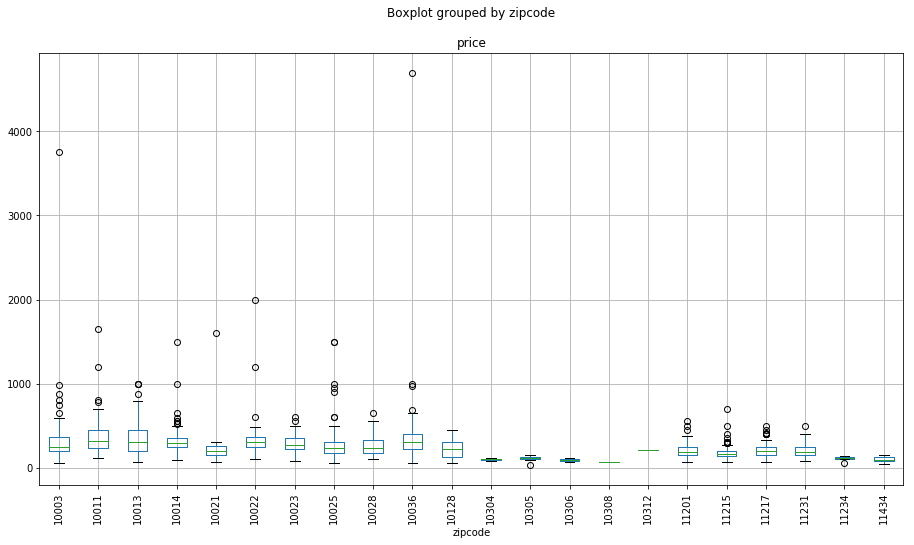

In [29]:
fig_out = plt.figure(figsize=(15,8))
ax1 = fig_out.add_subplot(111)
final_data.boxplot(column='price',by='zipcode',ax=ax1)
ax1.tick_params('x',labelrotation = 90)

We can actually see some prices are ridiculously high, lets analyse them further to see what is so special.

In [30]:
final_data[final_data['price'] > 1200]

,id,city,state,zipcode,bedrooms,last_scraped,square_feet,price,weekly_price,monthly_price,cleaning_fee,number_of_reviews,review_scores_rating,City,SizeRank,estimated_price
350,2307885,New York,NY,10011,2,2017-05-03,NaN,1650.0,NaN,NaN,NaN,10,100.0,New York,15,2354000.0
509,2281142,New York,NY,10003,2,2017-05-04,NaN,3750.0,NaN,NaN,NaN,0,NaN,New York,21,2005500.0
578,2243984,New York,NY,10014,2,2017-05-03,NaN,1500.0,NaN,NaN,NaN,0,NaN,New York,379,2476250.0
675,12376888,New York,NY,10036,2,2017-05-03,NaN,4700.0,NaN,NaN,70.0,6,97.0,New York,580,1729150.0
988,2266010,New York,NY,10022,2,2017-05-04,NaN,2000.0,NaN,NaN,NaN,0,NaN,New York,894,1863650.0
1039,5649623,New York,NY,10025,2,2017-05-03,NaN,1500.0,NaN,16500.0,NaN,9,98.0,New York,1,1342900.0
1061,2243769,New York,NY,10025,2,2017-05-03,NaN,1500.0,NaN,NaN,NaN,0,NaN,New York,1,1342900.0
1172,2284454,New York,NY,10021,2,2017-05-04,NaN,1600.0,NaN,NaN,NaN,0,NaN,New York,190,1709950.0


As we can see all these properties are extensive outliers because the prices are not in correlation with the median estimated prices of the houses.<br>
Even if we consider the data to be actually true, we have to consider them as complete outliers because they will definitely affect our predictions at later stages in our analysis. Thus we will be dropping these rows from our dataset as they are too far from our central prices in each zipcode.

In [31]:
final_data = final_data[final_data['price'] <= 1200]

Let us go ahead and check the weekly and monthly prices for our dataset

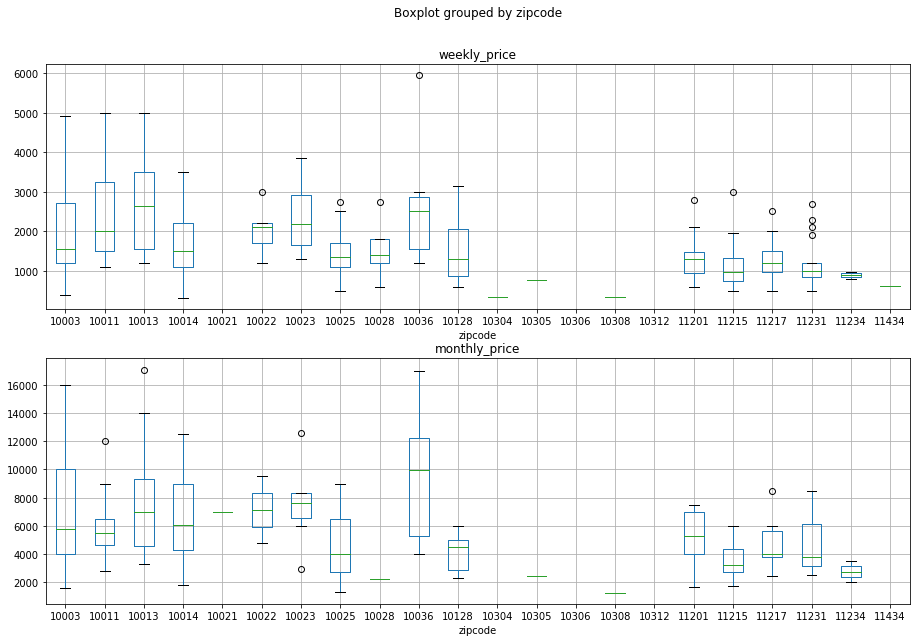

In [32]:
fig_out_2 = plt.figure(figsize=(15,10))

ax1 = fig_out_2.add_subplot(211)
final_data.boxplot(column='weekly_price',by='zipcode',ax=ax1)

ax2 = fig_out_2.add_subplot(212)
final_data.boxplot(column='monthly_price',by='zipcode',ax=ax2)

In [33]:
#We can go ahead and drop the state and last_scraped column
final_data.drop(columns=['state','last_scraped'], inplace=True)

Lets Handle Missing data in our data set

As we can see every property does not have missing data in daily price or estimated price. We can now try to estimate weekly price, square feet, monthly price and cleaning fee from our data.

In [34]:
#For square feet, we can try to get the mean square of properties in a particular zipcode.
final_data['square_feet'] = final_data.groupby('zipcode')['square_feet'].transform(lambda x:x.fillna(x.mean()))
#We can still see that some zipcodes have no data of square feet, which is of about 271 values
#It is a bit confusing to try to predict square feet with such less data, 
#even with the house prices being the same for every zipcode
#So we will decide to drop square feet and cleaning area because there is a logical correlation between the two.
final_data.drop(columns=['square_feet','cleaning_fee'], axis=1, inplace=True)

In [35]:
#Let us assign a region name to 'city' column. We will distinguish our data into 4 main regions across NY.
# Manhatten, Brooklyn, Queens, Staten Island.
def return_regions(df):
    regions = {'Staten Island':'Staten Island', 'Statenisland ':'Staten Island', 'Brooklyn' :'Brooklyn',
 'Chelsea, New York' : 'Manhatten', 'Brooklyn' : 'Brooklyn',
  'Jamaica ':'Queens', 'Queens' : 'Queens', 'Jamaica':'Queens', 'Brooklyn ' : 'Brooklyn', 'Park Slope, Brooklyn':'Brooklyn',
 'Park Slope ,Brooklyn' : 'Brooklyn'}
    if df['city'] in regions:
        return regions[df['city']]
    else:
        return return_zipcode_regions(df['zipcode'])

def return_zipcode_regions(zipcode):
    zipcode_regions = {11217 : 'Brooklyn', 10013 : 'Manhatten', 10011 : 'Manhatten', 10003 : 'Manhatten', 10014 : 'Manhatten', 10036 : 'Manhatten', 10128 : 'Manhatten', 10022 : 'Manhatten', 10025 : 'Manhatten',
       10028 : 'Manhatten', 10021 : 'Manhatten', 10023 : 'Manhatten'}
    if zipcode in zipcode_regions:
        return zipcode_regions[zipcode]
    else:
        return None
final_data['regions'] = final_data.apply(return_regions, axis=1)

In [36]:
#We can now go ahead and drop the city column as well since all regions in our dataset are from New York.
#We can also drop the bedrooms column because we know all of them are 2 bedrooms.
final_data.drop(columns=['city','bedrooms','City'],inplace=True)

Lets try to plot the relationship between daily price,weekly price and monthly price, and see if we can predict the missing values

In [37]:
price_1,weekly_price_1 = final_data[final_data['weekly_price'].isna()==False][['price','weekly_price']].values.T.tolist()
price_2,monthly_price_2 = final_data[final_data['monthly_price'].isna()==False][['price','monthly_price']].values.T.tolist()
weekly_price_3,monthly_price_3 = final_data[(final_data['weekly_price'].isna()==False) & (final_data['monthly_price'].isna()==False)][['price','weekly_price']].values.T.tolist() 

Text(0, 0.5, 'Monthly Price')

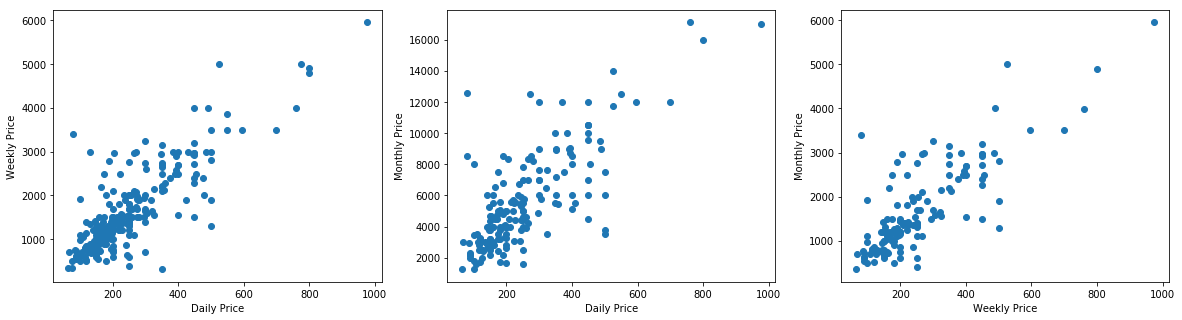

In [38]:
fig1 = plt.figure(figsize=(20,5))
ax1 = fig1.add_subplot(131)
ax1.scatter(price_1, weekly_price_1)
ax2 = fig1.add_subplot(132)
ax2.scatter(price_2,monthly_price_2)
ax3 = fig1.add_subplot(133)
ax3.scatter(weekly_price_3,monthly_price_3)
ax1.set_xlabel('Daily Price')
ax1.set_ylabel('Weekly Price')
ax2.set_xlabel('Daily Price')
ax2.set_ylabel('Monthly Price')
ax3.set_xlabel('Weekly Price')
ax3.set_ylabel('Monthly Price')

We can see that price vs weekly price, weekly price vs monthly price almost share a linear relationship.
Although we have too less of data, we can still try to fit a line through our data to estimate missing values. Some of this data does not make sense because, the weekly price is much higher than 7 times the daily price, which in turn would provide wrong analysis, because no tenants would end up renting weekly, instead they would just get it for 7 days. So let us only consider weekly prices that are less than 7 times the daily price to get as much accurate data as possible for the missing values. We will still consider outliers in our analysis. Similary we will consider the upper bound for the number of weeks in a month. So we will consider monthly prices that are less than 5 times the price of a week.

In [39]:
price_1, weekly_price_1 = np.array([[i[0],i[1]] for i in list(zip(price_1,weekly_price_1)) if i[1] <= 7*i[0]]).T
weekly_price_3,monthly_price_3 = np.array([[i[0],i[1]] for i in list(zip(weekly_price_3,monthly_price_3)) if i[1] <= 5*i[0]]).T

In [40]:
lm1 = LinearRegression()
lm1.fit(np.array(price_1).reshape(-1,1), np.array(weekly_price_1).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
lm2 = LinearRegression()
lm2.fit(np.array(weekly_price_3).reshape(-1,1), np.array(monthly_price_3).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'Monthly Price')

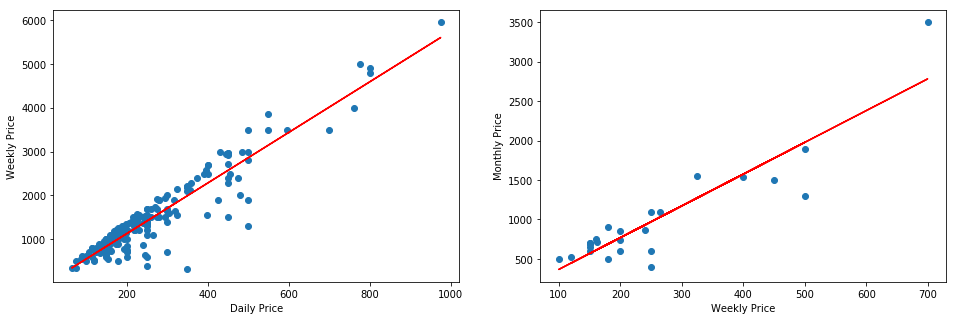

In [42]:
fig3 = plt.figure(figsize=(16,5))
ax1 = fig3.add_subplot(121)
ax1.scatter(price_1,weekly_price_1)
ax1.plot(price_1,lm1.predict(np.array(price_1).reshape(-1,1)), color = 'red')
ax2 = fig3.add_subplot(122)
ax2.scatter(weekly_price_3,monthly_price_3)
ax2.plot(weekly_price_3,lm2.predict(np.array(weekly_price_3).reshape(-1,1)), color='red')
ax1.set_xlabel("Daily Price")
ax1.set_ylabel("Weekly Price")
ax2.set_xlabel("Weekly Price")
ax2.set_ylabel("Monthly Price")

Lets predict our missing values for weekly price

In [43]:
final_data.loc[final_data['weekly_price'].isna(),'weekly_price'] = final_data['price'].apply(lambda x: round(lm1.predict([[x]])[0][0]))

Lets predict our missing values for monthly price

In [44]:
final_data.loc[final_data['monthly_price'].isna(),'monthly_price'] = final_data['weekly_price'].apply(lambda x: round(lm2.predict([[x]])[0][0]))

As we can see we have now finished cleaning the dataset. We have no Null values except in the review_score_rating column.
Given this data it is really hard to estimate our Null values of property review_ratings.

In [45]:
final_data.isna().sum()

id                        0
zipcode                   0
price                     0
weekly_price              0
monthly_price             0
number_of_reviews         0
review_scores_rating    263
SizeRank                  0
estimated_price           0
regions                   0
dtype: int64

#  Exploratory Data Analysis

Let us copy our cleaned dataframe to another dataframe and start our Exploratory Data Analysis

In [46]:
clean_data = final_data.copy(deep=True)
clean_data.head()

,id,zipcode,price,weekly_price,monthly_price,number_of_reviews,review_scores_rating,SizeRank,estimated_price,regions
0,15910991,10305,120.0,662.0,2630.0,0,NaN,2087,407900.0,Staten Island
1,17716523,10305,110.0,604.0,2397.0,0,NaN,2087,407900.0,Staten Island
2,16155769,10305,150.0,835.0,3327.0,0,NaN,2087,407900.0,Staten Island
3,13370393,10305,150.0,835.0,3327.0,0,NaN,2087,407900.0,Staten Island
4,2611458,10305,129.0,780.0,2415.0,13,86.0,2087,407900.0,Staten Island


In [47]:
#Lets create a colormap for our regions
region_colors = {'Manhatten' : 'red','Brooklyn' : 'blue', 'Queens' : 'green', 'Staten Island' : 'magenta'}
red_patch = mpatches.Patch(color='red', label='Manhatten')
blue_patch = mpatches.Patch(color='blue', label='Brooklyn')
green_patch = mpatches.Patch(color='green', label='Queens')
magenta_patch = mpatches.Patch(color='magenta', label='Staten Island')
l_handle = [red_patch, blue_patch, green_patch, magenta_patch]

## Number of zipcodes in each region in NY

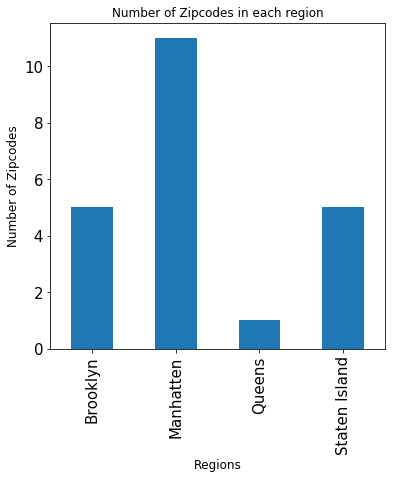

In [48]:
fig4 = plt.figure(figsize=(6,6))
ax1 = fig4.add_subplot(111)
clean_data.groupby('regions').agg({'zipcode' : 'nunique'}).plot(kind = 'bar',ax=ax1, legend=False)
ax1.set_ylabel("Number of Zipcodes", fontsize='large')
ax1.set_xlabel("Regions",fontsize='large')
ax1.set_title("Number of Zipcodes in each region")
ax1.tick_params(axis='both', which='major', labelsize=15)

## Number of Properties in every zipcode

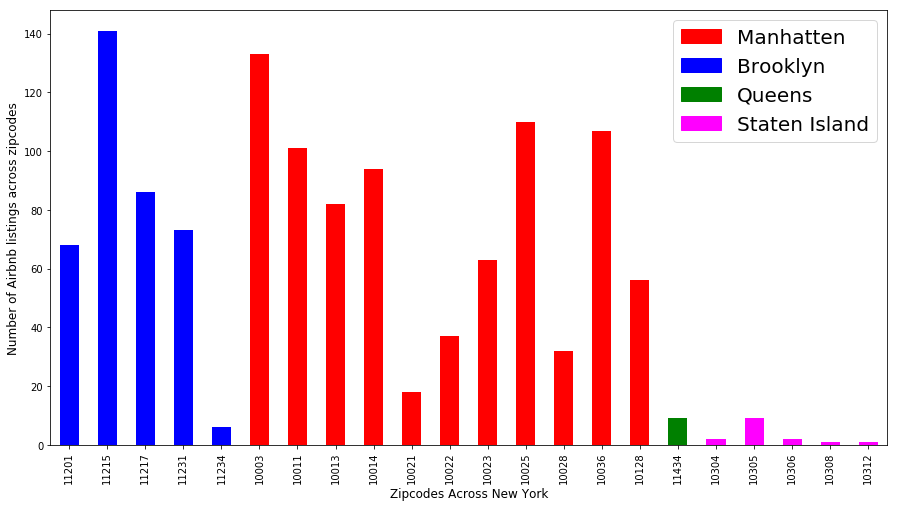

In [49]:
properties_in_zipcode = pd.pivot_table(clean_data[['regions','zipcode','id']], index=['regions','zipcode'], aggfunc=np.count_nonzero)
properties_in_zipcode.reset_index(inplace=True)
fig5 = plt.figure(figsize=(15,8))
ax1 = fig5.add_subplot(111)
#for region in region_colors:
#   ax1.bar(properties_in_zipcode[properties_in_zipcode['regions'] == region]['zipcode'],properties_in_zipcode[properties_in_zipcode['regions'] == region]['id'])
properties_in_zipcode.plot('zipcode','id',kind='bar',ax = ax1, color = properties_in_zipcode['regions'].apply(lambda x:region_colors[x]), legend = False)
ax1.set_xlabel("Zipcodes Across New York", fontsize = 'large')
ax1.set_ylabel("Number of Airbnb listings across zipcodes", fontsize = 'large')
ax1.legend(handles = l_handle, prop={'size': 20})

## 1 - Does review count in a specific neighbourhood actually affect the daily price?

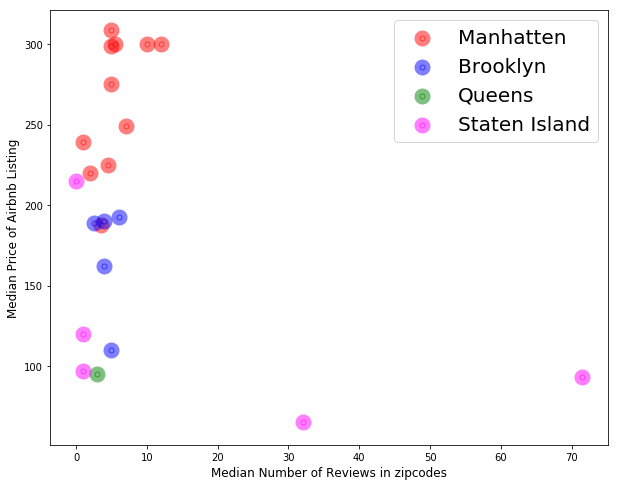

In [50]:
reviewcount_vs_price = clean_data.groupby(['zipcode','regions'], as_index=False).agg({'price' : 'median', 'number_of_reviews' : 'median'})
fig6 = plt.figure(figsize=(10,8))
ax1 = fig6.add_subplot(111)
for region in region_colors:
    ax1.scatter(reviewcount_vs_price[reviewcount_vs_price['regions']==region]['number_of_reviews'],reviewcount_vs_price[reviewcount_vs_price['regions']==region]['price'],label = region,linewidths=10, alpha = 0.5, color = region_colors[region])
ax1.set_ylabel('Median Price of Airbnb Listing', fontsize = 'large')
ax1.set_xlabel('Median Number of Reviews in zipcodes',fontsize = 'large')
ax1.legend(prop={'size': 20})

## Let us check if size rank has a corelation with price of airbnb prices
The lower the sizerank the higher the population

Text(0, 0.5, 'Daily Price of Airbnb Rental')

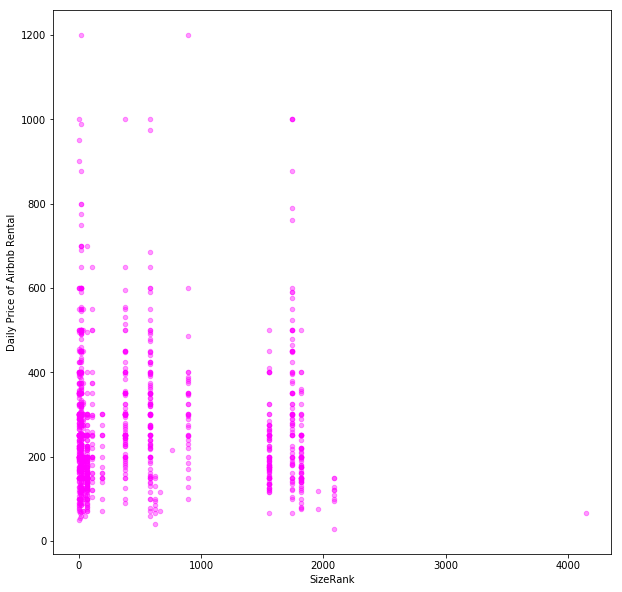

In [51]:
sizerank_vs_price = clean_data[['price','SizeRank']]
fig12 = plt.figure(figsize=(10,10))

ax1 = fig12.add_subplot(111)
sizerank_vs_price.plot('SizeRank','price',color = 'magenta',alpha = 0.4, kind = 'scatter', ax=ax1, legend=False)
ax1.set_xlabel("SizeRank")
ax1.set_ylabel("Daily Price of Airbnb Rental")

## Zillow House Prices across various Zipcodes

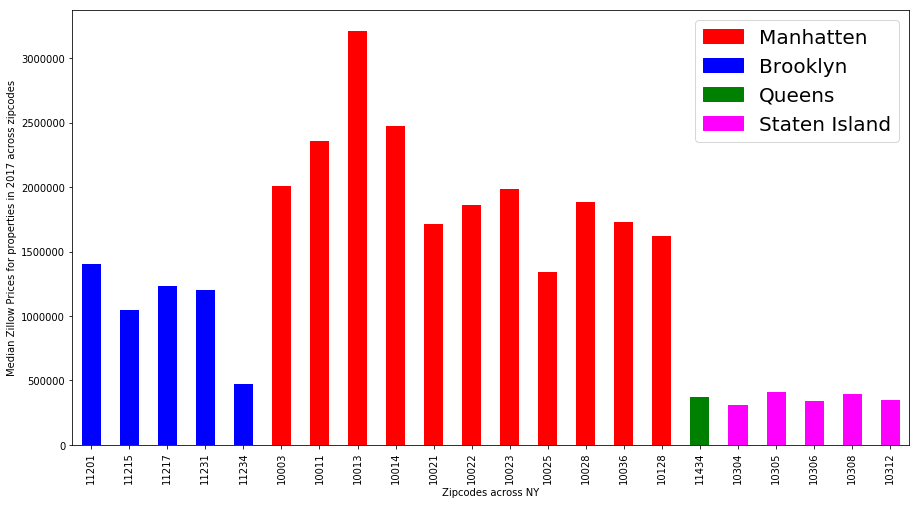

In [52]:
zillowprice_zipcodes = clean_data[['zipcode','regions','estimated_price']].drop_duplicates().sort_values('regions')
zillowprice_zipcodes.sort_values(['regions','zipcode'],ascending = [True,True], inplace=True)
fig7 = plt.figure(figsize=(15,8))
ax1 = fig7.add_subplot(111)
zillowprice_zipcodes.plot('zipcode','estimated_price',kind='bar',ax = ax1, color = zillowprice_zipcodes['regions'].apply(lambda x:region_colors[x]), legend = False)
ax1.set_xlabel("Zipcodes across NY")
ax1.set_ylabel("Median Zillow Prices for properties in 2017 across zipcodes")
ax1.legend(handles = l_handle,prop={'size': 20})

## Mean airbnb prices across zipcodes

Text(0.5, 1.0, 'Median Airbnb prices for every zipcode')

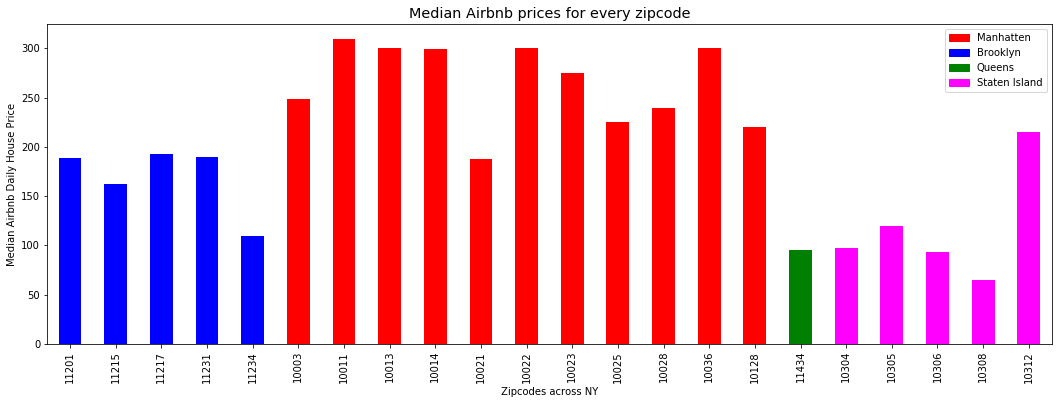

In [53]:
median_airbnb_zipcodes = clean_data.groupby(['zipcode','regions'], as_index=False).agg({'price' : 'median','weekly_price' : 'median','monthly_price' : 'median'})
median_airbnb_zipcodes.sort_values(['regions','zipcode'], ascending = [True,True], inplace = True)
fig8 = plt.figure(figsize=(18,20))
ax1 = fig8.add_subplot(311)
median_airbnb_zipcodes.plot('zipcode','price',kind='bar',ax = ax1, color = median_airbnb_zipcodes['regions'].apply(lambda x:region_colors[x]), legend = False)
ax1.set_xlabel("Zipcodes across NY")
ax1.set_ylabel("Median Airbnb Daily House Price")
ax1.legend(handles = l_handle, prop={'size': 10})
ax1.set_title("Median Airbnb prices for every zipcode", size = 'x-large')

## Calcuating yearly revenue from airbnb properties

### Assumptions
1 - All properties have a standard occupancy rate of 75% throughout the year.<br>
2 - All properties are booked Daily - 50% of the time, Weekly - 30% of the time, Monthly - 20% of the time.<br>
3 - A Month is considered as 30 days rental period, and a week is considered as 7 days rental period.<br>
###  Estimated Yearly revenue can be calculated as
estimated yearly revenue = $365*\frac{75}{100} (\frac{50}{100}*daily price + \frac{30}{100*7}*weekly price + \frac{20}{100*30}*monthly price)$

In [54]:
def estimate_yearly_revenue(df):
    return round(365 * 0.75 * ((0.5 * df['price']) + (0.3/7 * df['weekly_price']) + (2/300 * df['monthly_price'])))

In [55]:
clean_data['estimated_yearly_revenue'] = clean_data.apply(estimate_yearly_revenue, axis=1)

## Median yearly revenue for airbnb across various zipcodes

Text(0.5, 1.0, 'Median Airbnb Yearly Revenue for every zipcode')

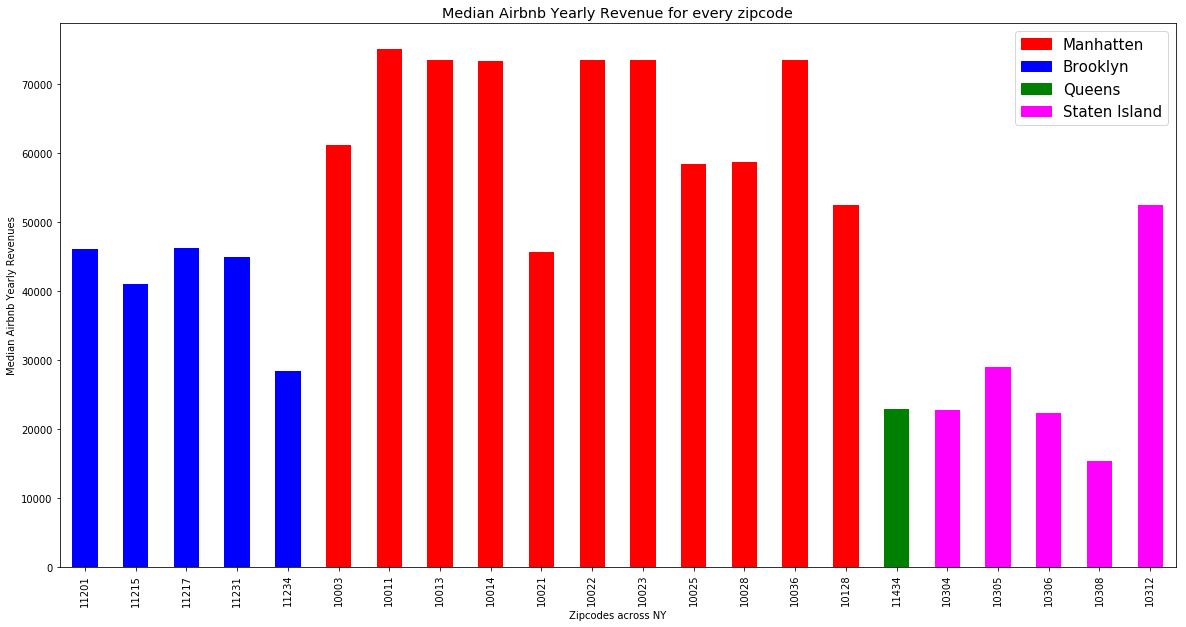

In [56]:
yearly_revenue = clean_data.groupby(['zipcode','regions'], as_index=False).agg({'estimated_yearly_revenue' : 'median'})
yearly_revenue.sort_values(['regions','zipcode'],inplace=True)
fig9 = plt.figure(figsize = (20,10))
ax1 = fig9.add_subplot(111)
yearly_revenue.plot('zipcode','estimated_yearly_revenue',kind='bar',ax = ax1, color = yearly_revenue['regions'].apply(lambda x:region_colors[x]), legend = False)
ax1.set_xlabel("Zipcodes across NY")
ax1.set_ylabel("Median Airbnb Yearly Revenues")
ax1.legend(handles = l_handle, prop={'size': 15})
ax1.set_title("Median Airbnb Yearly Revenue for every zipcode", size = 'x-large')

## lets plot the number of years it will take to recover the investment in these zipcodes

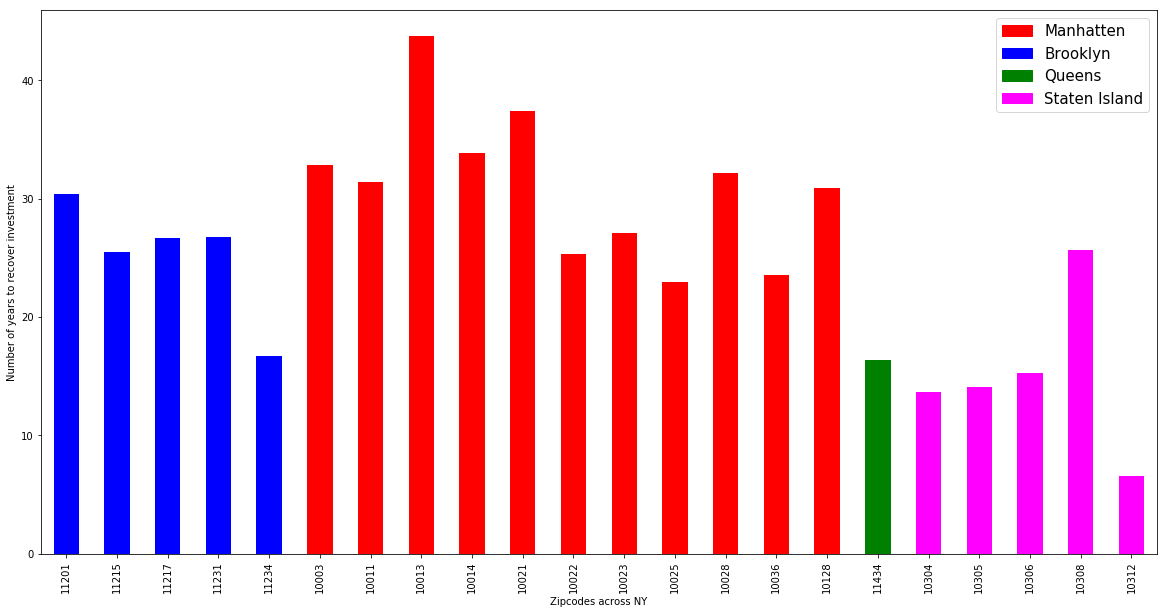

In [57]:
years_to_recover = clean_data.groupby(['zipcode','regions','estimated_price'], as_index=False).agg({'estimated_yearly_revenue' : 'median'})
years_to_recover['years'] = years_to_recover.apply(lambda x : x['estimated_price']/x['estimated_yearly_revenue'], axis = 1)
years_to_recover.sort_values(['regions','zipcode'], ascending = [True,True],inplace=True)
fig10 = plt.figure(figsize = (20,10))
ax1 = fig10.add_subplot(111)
years_to_recover.plot('zipcode','years',kind='bar',ax = ax1, color = years_to_recover['regions'].apply(lambda x:region_colors[x]), legend = False)
ax1.set_xlabel("Zipcodes across NY")
ax1.set_ylabel("Number of years to recover investment")
ax1.legend(handles = l_handle, prop={'size': 15})

## Lets plot a 30 Year summary of our investment for various zipcodes.

In [58]:
years_to_recover['0_years'] = years_to_recover['estimated_price'].apply(lambda x: -x)
years_to_recover['10_years'] = years_to_recover.apply(lambda x: (x['estimated_yearly_revenue']*10) - x['estimated_price'], axis=1)
years_to_recover['15_years'] = years_to_recover.apply(lambda x: (x['estimated_yearly_revenue']*15) - x['estimated_price'], axis=1)
years_to_recover['20_years'] = years_to_recover.apply(lambda x: (x['estimated_yearly_revenue']*20) - x['estimated_price'], axis=1)
years_to_recover['25_years'] = years_to_recover.apply(lambda x: (x['estimated_yearly_revenue']*25) - x['estimated_price'], axis=1)
years_to_recover['30_years'] = years_to_recover.apply(lambda x: (x['estimated_yearly_revenue']*30) - x['estimated_price'], axis=1)
years_to_recover.sort_values(['regions','zipcode'], inplace=True)

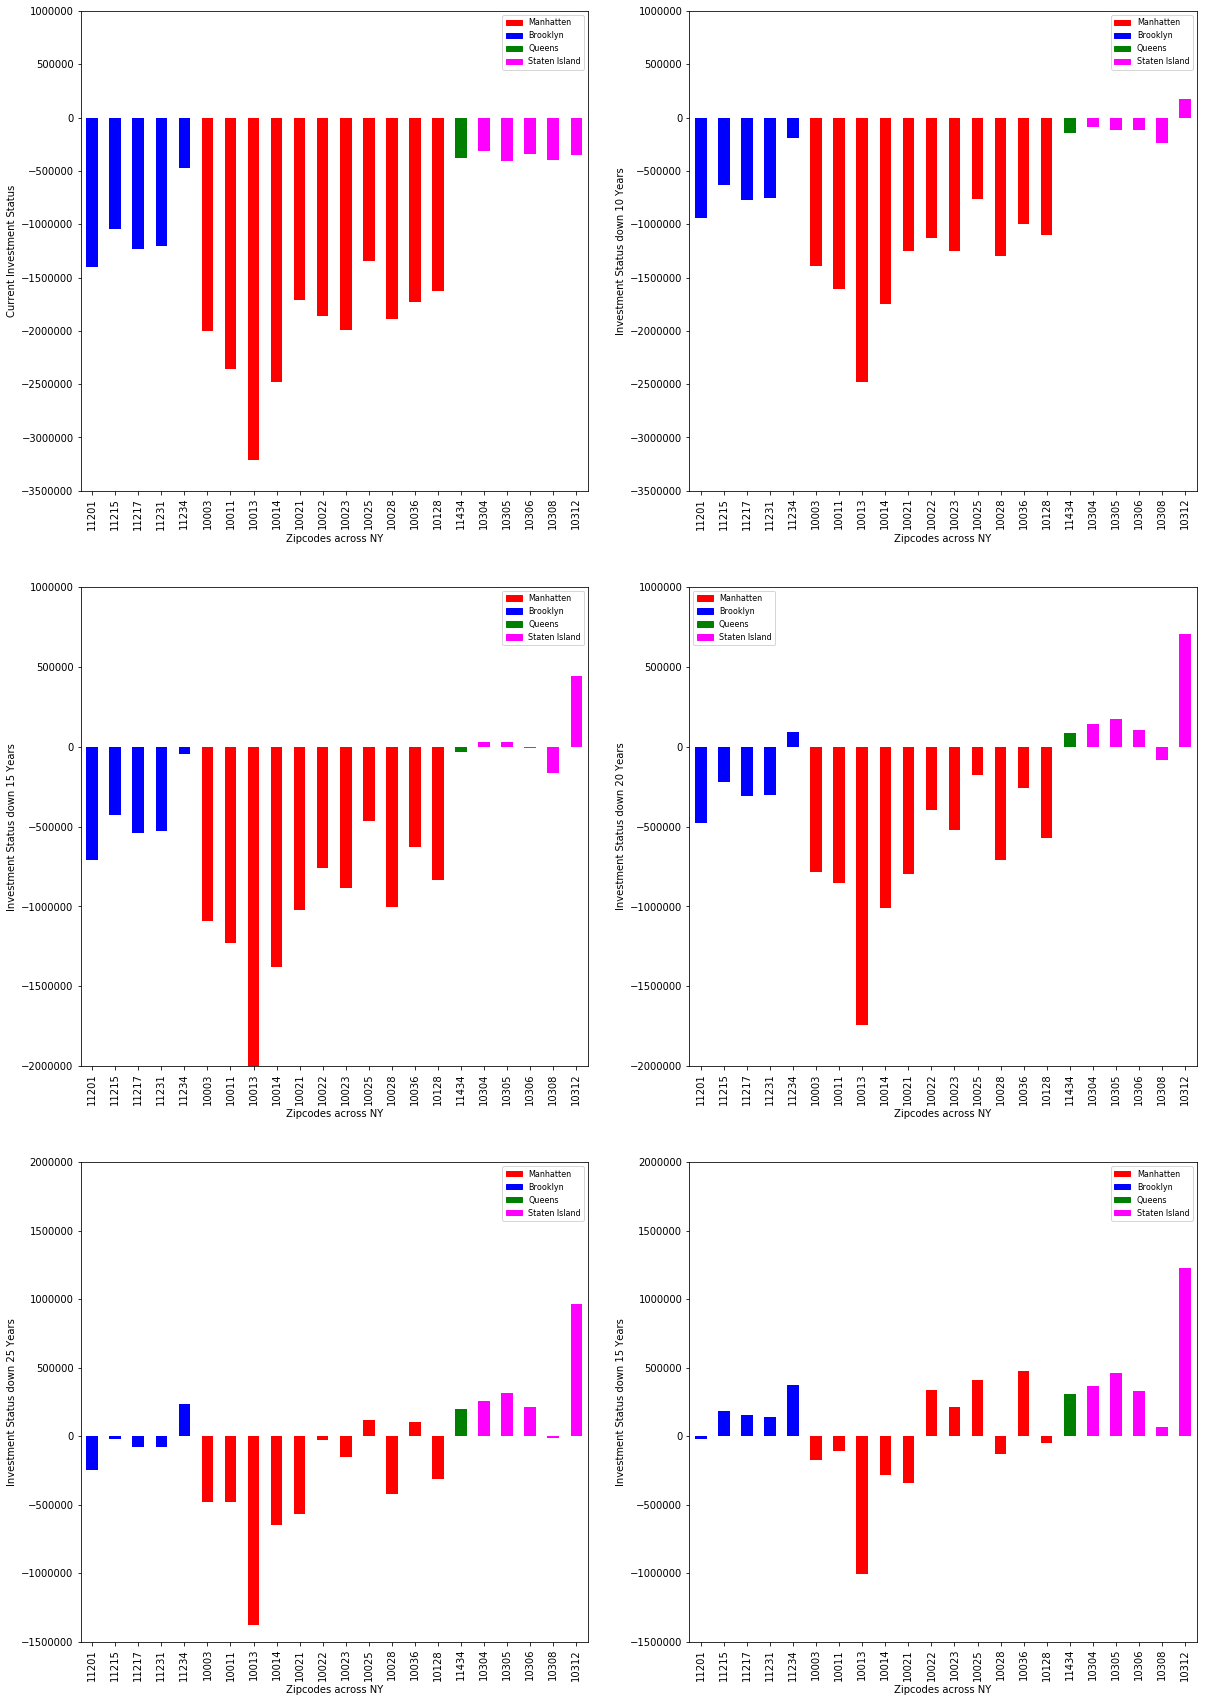

In [59]:
fig11 = plt.figure(figsize=(20,30))

ax1 = fig11.add_subplot(321)
years_to_recover.plot('zipcode','0_years',kind='bar',ax = ax1, color = years_to_recover['regions'].apply(lambda x:region_colors[x]), legend = False)
ax1.set_ylim(-3500000,1000000)
ax1.set_xlabel("Zipcodes across NY")
ax1.set_ylabel("Current Investment Status")
ax1.legend(handles = l_handle, prop={'size': 8})

ax2 = fig11.add_subplot(322)
years_to_recover.plot('zipcode','10_years',kind='bar',ax = ax2, color = years_to_recover['regions'].apply(lambda x:region_colors[x]), legend = False)
ax2.set_ylim(-3500000,1000000)
ax2.set_xlabel("Zipcodes across NY")
ax2.set_ylabel("Investment Status down 10 Years")
ax2.legend(handles = l_handle, prop={'size': 8})

ax3 = fig11.add_subplot(323)
years_to_recover.plot('zipcode','15_years',kind='bar',ax = ax3, color = years_to_recover['regions'].apply(lambda x:region_colors[x]), legend = False)
ax3.set_ylim(-2000000,1000000)
ax3.set_xlabel("Zipcodes across NY")
ax3.set_ylabel("Investment Status down 15 Years")
ax3.legend(handles = l_handle, prop={'size': 8})

ax4 = fig11.add_subplot(324)
years_to_recover.plot('zipcode','20_years',kind='bar',ax = ax4, color = years_to_recover['regions'].apply(lambda x:region_colors[x]), legend = False)
ax4.set_ylim(-2000000,1000000)
ax4.set_xlabel("Zipcodes across NY")
ax4.set_ylabel("Investment Status down 20 Years")
ax4.legend(handles = l_handle, prop={'size': 8})

ax5 = fig11.add_subplot(325)
years_to_recover.plot('zipcode','25_years',kind='bar',ax = ax5, color = years_to_recover['regions'].apply(lambda x:region_colors[x]), legend = False)
ax5.set_ylim(-1500000,2000000)
ax5.set_xlabel("Zipcodes across NY")
ax5.set_ylabel("Investment Status down 25 Years")
ax5.legend(handles = l_handle, prop={'size': 8})

ax6 = fig11.add_subplot(326)
years_to_recover.plot('zipcode','30_years',kind='bar',ax = ax6, color = years_to_recover['regions'].apply(lambda x:region_colors[x]), legend = False)
ax6.set_ylim(-1500000,2000000)
ax6.set_xlabel("Zipcodes across NY")
ax6.set_ylabel("Investment Status down 15 Years")
ax6.legend(handles = l_handle, prop={'size': 8})